# Thesis Notes

## Introduction

The motivation behind statistical learning is to identify the relationship between variables using observations or realized datasets. Particularly, the relationship between the independent variables and the depended variable or the input and the output. Let $Y$ be the output or the response and $X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$ be the inputs or the predictors. Generally, we can assume that this relationship can be expressed into the following general form $$Y = f(X) + \epsilon.$$ Here, $X = X_{1}, X_{2}, \ldots , X_{p-1}, X_{p}$, $f$ is some fixed but unknown function of the predictors and $\epsilon$ be some random noise. In this form, $f$ represents the systematic information that the inputs provides about the output. Identifying or estimating $f$ is valueble as it will give us the ability to make predictions and inferences.

### Prediction

In many settings, the input variables or predictors has been observed and are readily available and we want to use it to predict the value or outome of the output or the response. In this case, we assume that the random error has a mean of $0$. We can then predict $Y$ using  $$\hat{Y} = \hat{f}(X),$$ where $\hat{f}$ is our estimate for $f$. For prediction, we are typically not concerned of the actual form of $\hat{f}$ as long as it produces the most accurate results. Generally, $\hat{f}$ will not be a perfect estimate of $f$, thus errors will be introduced. There are two types of error that affects the accuracy of $\hat{f}$:

- **Reducible Error**: Errors that can be further reduced to improve the affuracy of $\hat{f}$.
- **Irreducible Error**: Errors that is inherent in $Y$ and independent from $f$, like from $\epsilon$, thus cannot be further reduced.

If we fix $\hat{f}$ and $X$, so that the only variability comes from $\epsilon$. Then we can see that 
\begin{align*}
E[(Y-\hat Y)^2] &= E[ (f(X) + \epsilon - \hat f(X))^2 ]\\
&= \underbrace{[ f(X) - \hat f(X) ]^2}_{\text{Reducible}} + \underbrace{Var(\epsilon)}_{\text{Irreducible}}
\end{align*}
where $E[Y-\hat Y]$ is the expected squared difference between the predicted and actual value of $Y$, and $Var(\epsilon)$ represents the *variance* associated with the error term $\epsilon$.

### Inference

In this approach, we are more interested in the actual form of $f$. Thus the estimated form, $\hat{f}$, is important to know. Answering the following guide questions might be important to know:

- What predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or the relationship is more complicated?

### Estimating $f$

Let $x_{ij}$ be the value of the jth predictor for observation $i$, where $i = 1,2,\ldots,n$ and $j=1,2,\ldots,p$. Then let $y_{i}$ be the value of the response variable for the ith observation. Our training dataset would be $\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ where $x_i=(x_{i1},x_{i2},\ldots,x_{ip})^T$. To estimate $f$, we need to apply statistical learning methods to find a function $\hat{f}$ such that $Y \approx \hat{f}(X)$ for every observation $(X,Y)$. Most statistical learning methods can be characterized as either *parametric* or *non-parametric*.

#### Parametric

#### Non-Parametric

#### Supervised vs. Unsupervised

#### Trade-Off Between Accuracy vs. Interpretability 

#### Model Accuracy and Bias-Variance Trade-Off

## Tree-Based Methods

### Regression Trees

Decision trees stratifies or segments the predictor space into a number of simple regions. To make predictions or classifications, we typically use the mean or the mode of the values of the observations/training data in the predictor region. It can be visualized by the following plot.

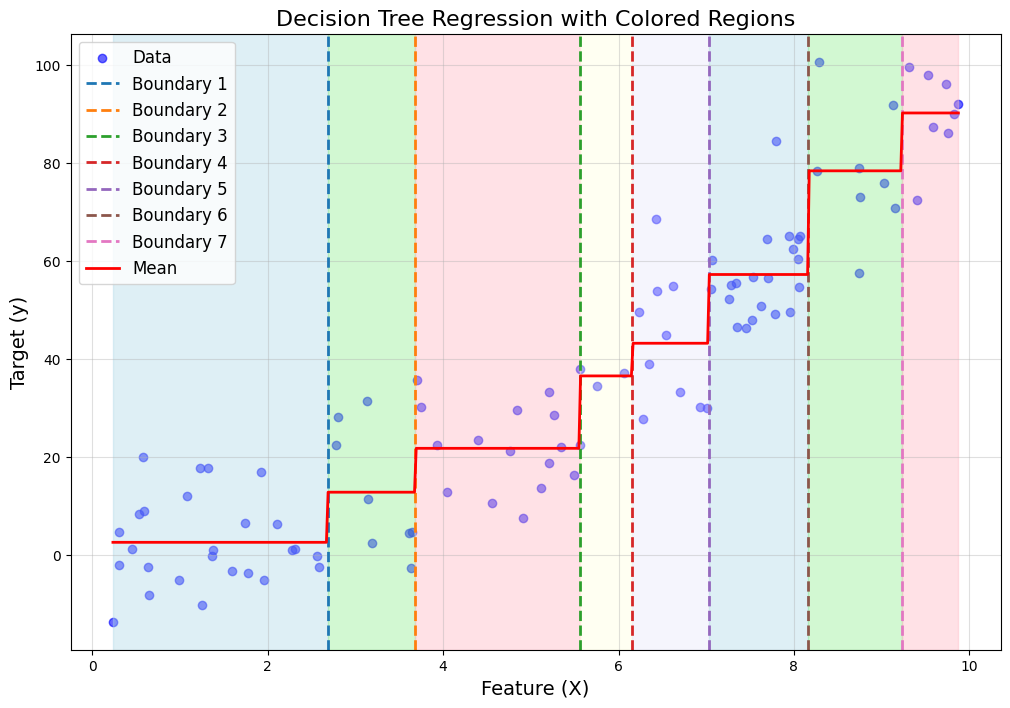

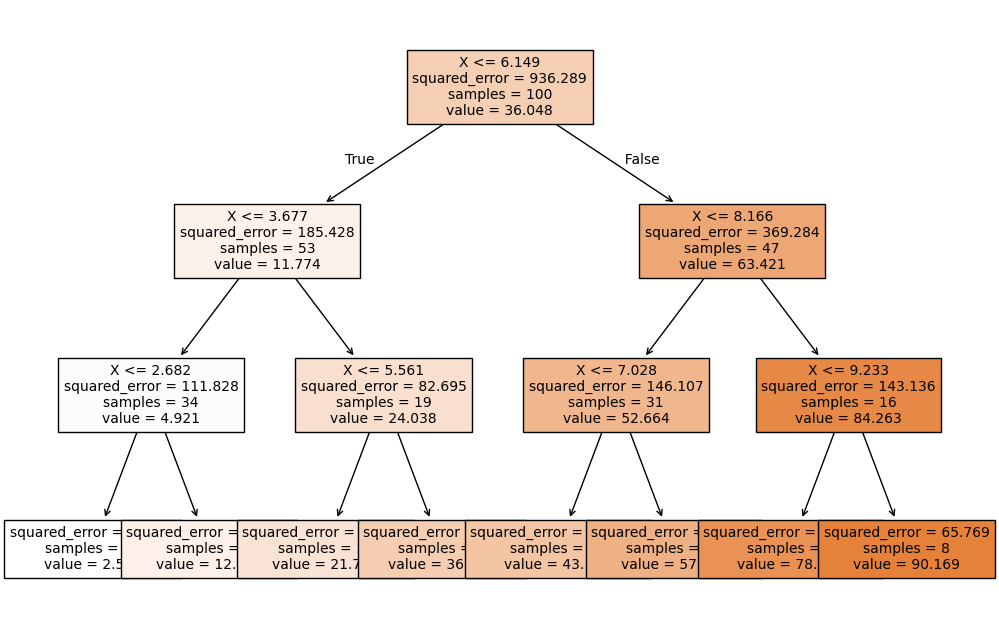

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = np.random.rand(100, 1) * 10
y = X.ravel() ** 2 + np.random.randn(100) * 10

regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X, y)

x_min, x_max = X.min(), X.max()
x_grid = np.linspace(x_min, x_max, 500).reshape(-1, 1)
y_pred = regressor.predict(x_grid)

thresholds = np.sort(regressor.tree_.threshold[regressor.tree_.threshold > 0])

colors = ListedColormap(["lightblue", "lightgreen", "lightpink", "lightyellow", "lavender"])

plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)

for i in range(len(thresholds) + 1):
    if i == 0:
        region_start = x_min
    else:
        region_start = thresholds[i - 1]
    
    if i == len(thresholds):
        region_end = x_max
    else:
        region_end = thresholds[i]
    
    plt.axvspan(region_start, region_end, color=colors(i % len(colors.colors)), alpha=0.4)

for i, threshold in enumerate(thresholds):
    plt.axvline(x=threshold, color=f"C{i}", linestyle="--", linewidth=2, label=f"Boundary {i+1}")
plt.plot(x_grid, y_pred, label="Mean", color="red", linewidth=2)
plt.title("Decision Tree Regression with Colored Regions", fontsize=16)
plt.xlabel("Feature (X)", fontsize=14)
plt.ylabel("Target (y)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=["X"], fontsize=10)
plt.show()


The regression tree is constructed by dividing the predictor space into into distinct and non-overlapping regions, $R_j$, which is then characterized by the mean/mode or mean response of the values of all the observation within that region. In finding these regions, it would be computationally expensive and impossible, especially when working with high-dimensional rectangles, to check for every combination of regions that minimizes the Residual Sum of Squares given by $$\sum_{j = 1}^J \sum_{i \in R_j} (y_i - \hat y_{R_j})^2$$ where $\hat y_{R_j}$ is the mean response for the training observations in the jth region.

#### Recursive Binary Splitting

*Recursive Binary Splitting* is an approach used to create regression trees. It is a greedy top-down approach that begins with one predictor space and picks the best split that minimizes the RSS,  then repeats this on the smaller predictor space until a limiting parameter is reached. It splits the predictor regions into $\{X|X_j < s\}$ and $\{X|X_j \ge s\}$ where $s$ is the cut point of the predictor $X_j$ such that it has the smallest value for the RSS in that iteration. In other words, for every $j$ and $s$, we define the pair of half-planes $$R_1(j,s) = \{X|X_j < s\} \text{ and } R_2(j,s) = \{X|X_j \ge s\}$$ we then choose $j,s$ that minimizes the values of $$\sum_{i:x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i:x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^2$$ where $\hat{y}_{R_1}$ is the mean response for the training observations in $R_1(j,s)$ and $\hat{y}_{R_2}$ is the mean response for the training observations in $R_2(j,s)$.\
 **This approach is greedy because it only chooses the split that minimizes the RSS every iteration and does not take the RSS of the final tree into consideration.**

#### Cost Complexity Pruning

The approach mentioned above will yield a good decision tree for the **training data** but may not yield the same results for the test data or any predictions made after. This is due to the possibility of overfitting the model to the training data and making it too complex or too big to yield a small RSS. Thus, making the regression tree less complex or smaller might yield better results for the test data and predictions, lowering the variance and improving the interpretability in exchange for higher bias.\
*Cost Complexity Pruning* is one approach that simplifies the model by letting it grow bigger and more complex and then uses a cost function that penalizes complexity to *'prune'* or remove leaves to make the regression tree smaller and less complex. Now, rather than considering every possible subtree of the original tree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$. Let $T_0$ be the biggest tree obtained that minimizes the RSS against the training data, each value of $\alpha$ corresponds to a subtree $T \subset T_0$ such that $$\sum_{m=1}^{|T|} \sum_{i:x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$ is the smallest, where |T| is the number of termainal nodes or leaves of the tree $T$, $R_m$ is a region of the predictor space corresponing to the mth terminal node, and $\hat{y}_{R_m}$ is the predicted response associated with $R_m$. This cost function balances the trade-off between the complexity of the model and its fit to the training data, mitigating overfitting.

## Ensemble Learning

### Strong vs. Weak Learner

Methods like linear regression and decision tree training processes are classified as learners. They can be further categorized as strong or weak learners based on the accuracy of the models they produce. A method is considered a strong learner if it can, with high probability, accurately approximate the underlying function that relates input and output variables. In contrast, a weak learner produces approximations that perform only slightly better than random guessing. Generally, the depth of a decision tree training process determines whether or not it is a strong or weak learner; the more depth of the tree means the stronger learner it becomes. Ensemble learning is a method that combines many weak learners to create a stronger learner.

### Boosting

Boosting is one of many ensemble learning methods that uses a combination of weak learners to create a strong one. In our case, we will focus on decision trees as our weak learner.

#### Adaptive Boosting (AdaBoost)

**Intuition:** Assigns higher weights to misclassified instances and retrains weak learners sequentially.

- Uses **decision stumps** (shallow trees) as weak learners.
- In each iteration, misclassified samples receive **higher weights**, so the next weak learner focuses more on difficult cases.
- Final prediction is a weighted sum of weak learners' outputs.
- Sensitive to **noisy data** and **outliers** since it increases their weight.

#### Gradient Boosting

The main idea behind gradient boosting is to create a sequence of decision trees that tries to correct the error of the one before it and use the weighted sum of all the trees as our final model. In other words, let $x_i$ be the predictor vector, $y_i$ be the response variable, $(X,Y) = \{(x_i,y_i): i \in I\}$ be our training data set, and $\{\hat{f}_n(x)\}$ where $n=1, \ldots ,p$ be a sequence of decision trees. We train a decision tree of depth $d$ using $(X,Y)$ and define output model as $\hat{f}_1(x)$. Then, for some $\lambda > 0$, we let $r_i = y_i - \lambda \hat{f}_{1}(x_i)$ for all $i \in I$ be the residuals, we again train a decision tree of depth $d$ but now using $(X,R) = \{(x_i,r_i): i \in I\}$ and define output model as $\hat{f}_2(x)$. We repeat this by letting $s_i = r_i - \lambda \hat{f}_{2}(x_i)$ for all $i \in I$ and training another decision tree using $(X,S) = \{(x_i,s_i): i \in I\}$ to get $\hat{f}_3(x)$, and so on. Then using the sequence of decision trees $\{\hat{f}_n(x)\}$, our final model will be $$\hat{f}(x) = \sum_{n = 1}^p \lambda \hat{f}_n(x).$$ The parameter $\lambda$ or the shrinkage parameter, serves as our learning rate and slows down the learnign method of the process. This slow learning approach tends to perform better as it reduces the risk of overfitting and serves as a form of regularization which prevents the model in fitting the noise.
##### Missing Details:
- In **Gradient Boosting**, residuals correspond to negative gradients of a loss function with respect to the model’s predictions.
- If the loss function were squared error loss (for regression), the residuals naturally correspond to the negative gradient.

##### Learning Rate

*if needed*

#### Extreme Gradient Boosting (XGBoost)

**Intuition:** An optimized version of Gradient Boosting with faster training, regularization, and scalability.

- Uses **second-order gradients** (Hessian) for better optimization.
- **L1 & L2 regularization** (like Lasso and Ridge) to reduce overfitting.
- Parallelized and optimized for speed.
- Handles **missing values** efficiently.

##### Regularization

## Principal Component Analysis

Principal component analysis is a method used to derive a low-dimension set of features from a large set of variables. This *dimension reduction* approach reduces the problem of creating a model of a respone with $p$ number of features to creating a model with just $m$ number of features where $m < p$. In particular, if we have the predictors $x_1, x_2, \ldots, x_{p-1}, x_p$, we can reduce the number of predictors to $z_1, z_2, \ldots, z_{m-1}, z_m$ where $m < p$, and that $z_i$ is a linear combination of $x_1, x_2, \ldots, x_{p-1}, x_p$. That is, $$z_j = \sum^p_{i=1} \phi_{ij} x_i$$ for some constants $\phi_{1j}, \phi_{2j}, \ldots, \phi_{pj}$ where $j = 1, 2, \ldots, m$. If done properly, the latter models can outperform the former. In our case, we will use principal component analysis to mitigate overfitting since we have a small amount of data relative to the number of features we wanted to use.

## Cross-Validation Method*

**find one*